In [5]:
import csv
from matplotlib import pyplot as plt
from collections import Counter
from urlparse import urlparse
import os
from os.path import join
import seaborn as sns
import pandas as pd

In [6]:
ALEXA_LIST = "top-1m.csv"

# Histograms of Domain Name Lengths

In [7]:
def plot_histogram(domain_lengths, title):
    
    fig, ax = plt.subplots(figsize=(12,4))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.grid(True)
    plt.tick_params(labelsize=17)
    bin_num = max(domain_lengths) - min(domain_lengths) + 1
    plt.hist(domain_lengths, bins=bin_num)
    plt.xlabel("Domain length", fontsize=22)
    plt.ylabel("Count", fontsize=22)
    if len(title) > 0:
        plt.title(title)
    plt.savefig('alexa_1m_lengths.pdf', bbox_inches="tight")
    #plt.show()   

In [8]:
def remove_www_from_url(domains):
    new_domains = []
    for item in domains:
        if item[:4] == 'www.':
            new_domains.append(item[4:])
        else:
            new_domains.append(item)
    return new_domains

In [9]:
#Function to read domains and their from Alexa's list
def process_alexa_list(fname, remove_www = True):
    
    domains = []
    with open(fname) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            domains.append(row[1])
    if remove_www:
        domains = remove_www_from_url(domains)
    domain_lengths = [len(x) for x in domains]

    return domains, domain_lengths

In [19]:
alexa_domains, alexa_domain_lengths = process_alexa_list(ALEXA_LIST)

### Histogram of domain name lengths in Alexa list

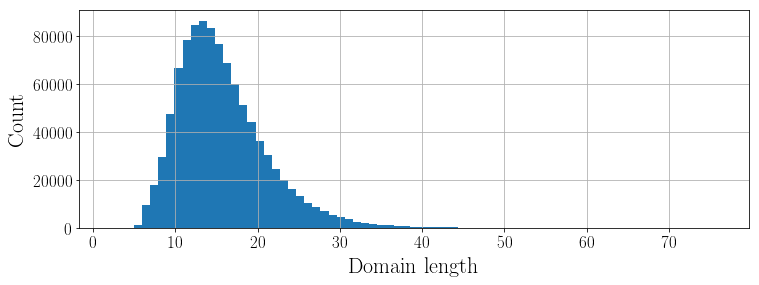

In [12]:
#Display histogram of domain lengths in Alexa list
plot_histogram(alexa_domain_lengths, "")

In [18]:
COUNTRY_DIR = "country_lists"

In [14]:
def censor_list(fname, remove_www = True):

    domains = []
    with open(fname) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        next(csv_reader, None)
        for row in csv_reader:
            base_url = urlparse(row[0]).netloc
            domains.append(base_url)
            #domains.append(row[0].split('/')[2])
    if remove_www:
        domains = remove_www_from_url(domains)
    domains = list(set(domains))
    domain_lengths = [len(x) for x in domains]

    return domains, domain_lengths

In [15]:
country_files = os.listdir(COUNTRY_DIR)
country_dict = {'tm.csv' : "Turkmenistan", "ir.csv" : "Iran", "er.csv" : "Eritrea", 
                "sa.csv" : "Saudi Arabia", "vn.csv" : "Vietnam", "cn.csv" : "China"}

### Histograms of domain name lengths in country censor lists

We remove www from the URL (and do the same in Alexa domains since we want to compare the lists). The Alexa list only contains domains, whereas Saudi Arabia's list contains entries with full paths. Currently, taking only domains from the censored lists.

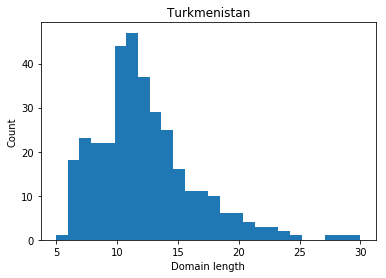

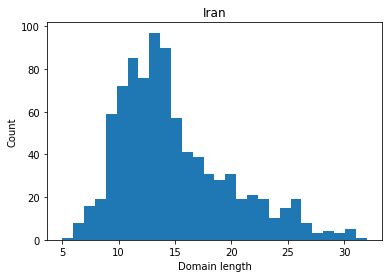

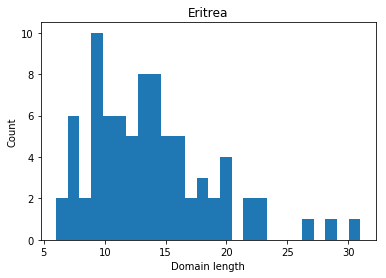

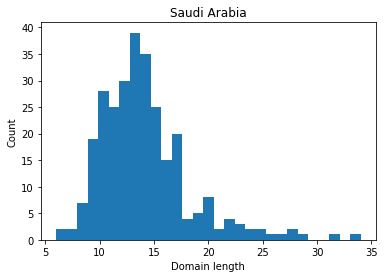

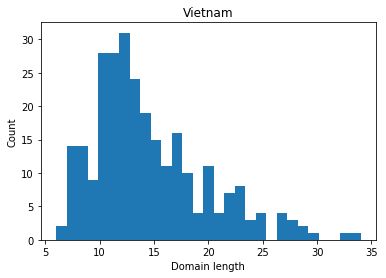

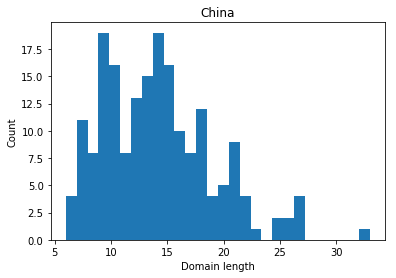

In [86]:
#Display histogram of domain lengths for country censor lists
for country in country_files:
    country_fname = join(COUNTRY_DIR, country)
    country_domains, country_domain_lengths = censor_list(country_fname)
    plot_histogram(country_domain_lengths, country_dict[country])

In [20]:
alexa_domain_dict = {}
for i in range(0, len(alexa_domains)):
    if alexa_domain_lengths[i] not in alexa_domain_dict:
        alexa_domain_dict[alexa_domain_lengths[i]] = []
    alexa_domain_dict[alexa_domain_lengths[i]].append(alexa_domains[i])

In [89]:
alexa_rank_dict = {}
for i in range(0, len(alexa_domains)):
    if alexa_domains[i] not in alexa_rank_dict:
        alexa_rank_dict[alexa_domains[i]] = i+1

In [76]:
def check_censored_in_alexa(alexa_domain_dict, censored_domains, country_name):

    anonymity_set_size_list = []
    length_list = []

    for cd in censored_domains:
        cd_length = len(cd)
        anonymity_set_size = len(alexa_domain_dict[cd_length])
        anonymity_set_size_list.append(anonymity_set_size)
        length_list.append(cd_length)
        
    min_anon_set_index = anonymity_set_size_list.index(min(anonymity_set_size_list))
    min_anon_set_length = length_list[min_anon_set_index]

    print "Anonymity set size stats for", country_name, ":"
    print "Min:", min(anonymity_set_size_list), min_anon_set_length
    print "Max:", max(anonymity_set_size_list)

# Anonymity set stats

We look at domain lengths in the censored list, and find how many domains in the Alexa list have the same length. We report the minimum and maximum anonmity set sizes we observe.

In [77]:
for country in country_files:
    country_fname = join(COUNTRY_DIR, country)
    country_domains, country_domain_lengths = censor_list(country_fname)
    check_censored_in_alexa(alexa_domain_dict, country_domains, country_dict[country])

Anonymity set size stats for Turkmenistan :
Min: 1318 5
Max: 86597
Anonymity set size stats for Iran :
Min: 1318 5
Max: 86597
Anonymity set size stats for Eritrea :
Min: 3552 31
Max: 86597
Anonymity set size stats for Saudi Arabia :
Min: 1603 34
Max: 86597
Anonymity set size stats for Vietnam :
Min: 1603 34
Max: 86597
Anonymity set size stats for China :
Min: 2171 33
Max: 86597


# Ranking stats

We look at each domain in the censored list and find their ranking in the Alexa list. A rank of -1 is assigned if a domain is not in the Alexa list.

In [29]:
def find_ranking_in_alexa(country_domains, alexa_domains, country_name):
    
    print "Stats for", country_name, ":"
    ranking_list = []
    for cd in country_domains:
        if cd in alexa_domains:
            ranking_list.append(alexa_domains.index(cd) + 1)
        else:
            ranking_list.append(-1)
    return ranking_list

In [30]:
country_list = [country_dict[x] for x in country_files]

Total number of domains in each censor list and number of those domains found in Alexa list.

In [31]:
all_ranking_data = []
for country in country_files:
    country_fname = join(COUNTRY_DIR, country)
    country_domains, country_domain_lengths = censor_list(country_fname)
    ranking_list = find_ranking_in_alexa(country_domains, alexa_domains, country_dict[country])
    not_found = Counter(ranking_list)[-1]
    all_ranking_data.append(ranking_list)
    print "Total number of domains:", len(country_domains)
    print "Number of domains not found in Alexa list:", not_found

Stats for Turkmenistan :
Total number of domains: 344
Number of domains not found in Alexa list: 246
Stats for Iran :
Total number of domains: 877
Number of domains not found in Alexa list: 600
Stats for Eritrea :
Total number of domains: 81
Number of domains not found in Alexa list: 43
Stats for Saudi Arabia :
Total number of domains: 284
Number of domains not found in Alexa list: 219
Stats for Vietnam :
Total number of domains: 274
Number of domains not found in Alexa list: 218
Stats for China :
Total number of domains: 191
Number of domains not found in Alexa list: 94


### Boxplot of ranking per country -- including sites not found (rank = -1)

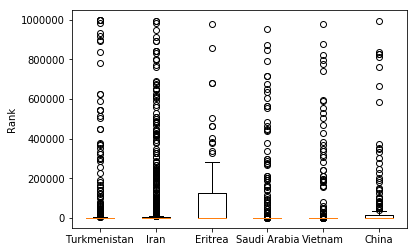

In [68]:
#Display all ranking (including not found -- not found is set to -1)
plt.boxplot(all_ranking_data)
plt.ylabel("Rank")
plt.xticks(range(1, 7), country_list)
plt.show()

### Boxplot of ranking per country --removing sites not found (rank = -1)

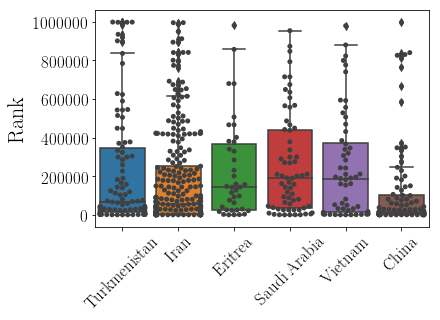

In [54]:
#Display ranking with not found domains removed
all_ranking_data_found = []
for rd in all_ranking_data:
    rd_found = [x for x in rd if x != -1]
    all_ranking_data_found.append(rd_found)
df = pd.DataFrame(all_ranking_data_found)
df = df.transpose()
df.columns = country_list
sns.boxplot(data=df)
sns.swarmplot(data=df, color=".25")
plt.ylabel("Rank", fontsize=22)
plt.tick_params(labelsize=17)
plt.xticks(rotation=45)
#plt.xticks(range(1, 7), country_list)
#plt.show()
plt.savefig('censored_ranking.pdf', bbox_inches="tight")

# Ranking stats - by country

We do a by-country analysis. First, we look at a country's list and find domains with small anonymity set sizes within the list (setting the size to <= 5 for now). Then, we find the ranking of these small anonymity domains within the Alexa list. If the ranking is high, we could potentially block them with lower collateral damage. 

In [55]:
def find_non_anonymous(domains, domain_lengths, set_size=1):

    domain_dict = {} #domain_dict has key=length and value=list of domains of that length
    for i in range(0, len(domains)):
        if domain_lengths[i] not in domain_dict:
            domain_dict[domain_lengths[i]] = []
        domain_dict[domain_lengths[i]].append(domains[i])

    low_anon_domains = []

    length_counter = Counter(domain_lengths)
    for k, v in length_counter.items():
        if v <= set_size:
            low_anon_domains += domain_dict[k]
    return low_anon_domains, domain_dict

### Total number of low anonymity set size domains and number of those found in Alexa

In [62]:
low_anon_all_ranking_data = []
print "Stats for domains with small anonymity sets"
for country in country_files:
    country_fname = join(COUNTRY_DIR, country)
    country_domains, country_domain_lengths = censor_list(country_fname)
    low_anon_domains, domain_dict = find_non_anonymous(country_domains, country_domain_lengths, set_size=5)
    low_anon_ranking_list = find_ranking_in_alexa(low_anon_domains, alexa_domains, country_dict[country])
    not_found = Counter(low_anon_ranking_list)[-1]
    low_anon_all_ranking_data.append(low_anon_ranking_list)
    print "Total number of domains:", len(low_anon_domains)
    print "Number of domains not found in Alexa list:", not_found

Stats for domains with small anonymity sets
Stats for Turkmenistan :
Total number of domains: 17
Number of domains not found in Alexa list: 15
Stats for Iran :
Total number of domains: 17
Number of domains not found in Alexa list: 15
Stats for Eritrea :
Total number of domains: 37
Number of domains not found in Alexa list: 26
Stats for Saudi Arabia :
Total number of domains: 33
Number of domains not found in Alexa list: 25
Stats for Vietnam :
Total number of domains: 29
Number of domains not found in Alexa list: 26
Stats for China :
Total number of domains: 27
Number of domains not found in Alexa list: 19


### Boxplot of ranking per country -- including sites not found (rank = -1)

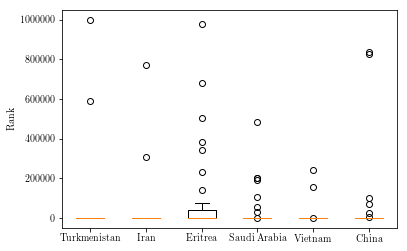

In [60]:
#Display all ranking (including not found -- not found is set to -1)
plt.boxplot(low_anon_all_ranking_data)
plt.ylabel("Rank")
plt.xticks(range(1, 7), country_list)
plt.show()

### Boxplot of ranking per country --removing sites not found (rank = -1)

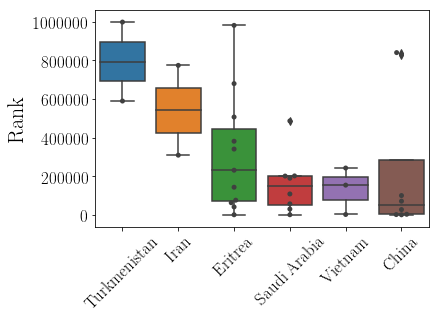

In [61]:
#Display ranking with not found domains removed
low_anon_all_ranking_data_found = []
for rd in low_anon_all_ranking_data:
    rd_found = [x for x in rd if x != -1]
    low_anon_all_ranking_data_found.append(rd_found)
df = pd.DataFrame(low_anon_all_ranking_data_found)
df = df.transpose()
df.columns = country_list
sns.boxplot(data=df)
sns.swarmplot(data=df, color=".25")
plt.ylabel("Rank", fontsize=22)
plt.tick_params(labelsize=17)
plt.xticks(rotation=45)
#plt.xticks(range(1, 7), country_list)
plt.show()
#plt.savefig('censored_ranking.pdf', bbox_inches="tight")

In [21]:
low_anon_length_list = [5, 5, 31, 34, 34, 33]
low_anon_length_list = list(set(low_anon_length_list))

In [23]:
alexa_low_anon_rankings = []
for item in low_anon_length_list:
    print(item)
    rankings = []
    domains = alexa_domain_dict[item]
    for domain in domains:
        rankings.append(alexa_domains.index(domain))
    alexa_low_anon_rankings.append(rankings)

33
[5574, 14118, 16797, 20771, 25099, 28845, 39158, 42434, 44996, 46462]
34
[20482, 30458, 30984, 34553, 53252, 57803, 64232, 65916, 66772, 73245]
5
[42, 384, 688, 722, 779, 862, 1171, 1172, 1255, 1263]
31
[7677, 12940, 25323, 25838, 32343, 35689, 36335, 39167, 47145, 47721]


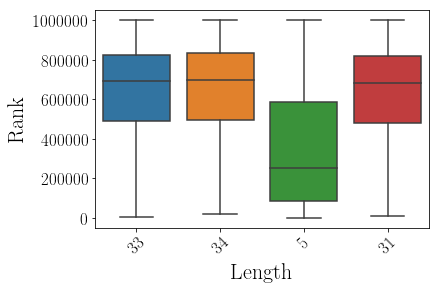

In [26]:
df = pd.DataFrame(alexa_low_anon_rankings)
df = df.transpose()
df.columns = low_anon_length_list
sns.boxplot(data=df)
#sns.swarmplot(data=df, color=".25")
plt.ylabel("Rank", fontsize=22)
plt.xlabel("Length", fontsize=22)
plt.tick_params(labelsize=17)
plt.xticks(rotation=45)
#plt.xticks(range(1, 7), country_list)
plt.show()

# Country Analysis

In [67]:
def find_minmax_anonymous(domains, domain_lengths):

    domain_dict = {} #domain_dict has key=length and value=list of domains of that length
    for i in range(0, len(domains)):
        if domain_lengths[i] not in domain_dict:
            domain_dict[domain_lengths[i]] = []
        domain_dict[domain_lengths[i]].append(domains[i])

    length_counter = Counter(domain_lengths)
    max_anonset_len = max(length_counter, key=length_counter.get)
    min_anonset_len = min(length_counter, key=length_counter.get)
    max_anonset_val = length_counter[max_anonset_len]
    min_anonset_val = length_counter[min_anonset_len]

    return max_anonset_len, min_anonset_len, max_anonset_val, min_anonset_val

In [109]:
def find_length_rankings_in_alexa(length, alexa_domain_dict, alexa_domains):
    
    rankings = []
    domains = alexa_domain_dict[length]
    for domain in domains:
        rankings.append(alexa_rank_dict[domain])
    return rankings, len(domains)

In [110]:
def find_popular(country_domains):
    
    min_pop = 1000000
    popular = ""
    for domain in country_domains:
        if (domain in alexa_rank_dict) and (alexa_rank_dict[domain] < min_pop):
            min_pop = alexa_rank_dict[domain]
            popular = domain
    return popular


Finding data for Turkmenistan

In country list, minimum anonymity set size is 1 for a domain length of 5
Removing this length removes 1318 domains in Alexa

In country list, maximum anonymity set size is 47 for a domain length of 11
Removing this length removes 78603 domains in Alexa

In country list, most popular website is yandex.ru with length 9
Removing this length removes 47753 domains in Alexa
1318 78603 47753


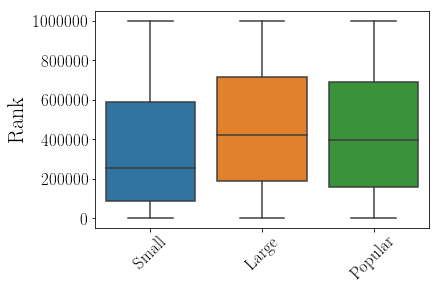


Finding data for Iran

In country list, minimum anonymity set size is 1 for a domain length of 5
Removing this length removes 1318 domains in Alexa

In country list, maximum anonymity set size is 97 for a domain length of 13
Removing this length removes 86597 domains in Alexa

In country list, most popular website is google.com with length 10
Removing this length removes 66923 domains in Alexa
1318 86597 66923


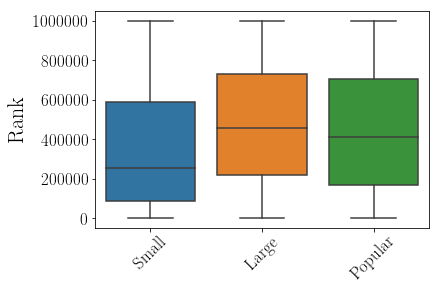


Finding data for Eritrea

In country list, minimum anonymity set size is 1 for a domain length of 27
Removing this length removes 8525 domains in Alexa

In country list, maximum anonymity set size is 10 for a domain length of 9
Removing this length removes 47753 domains in Alexa

In country list, most popular website is bbc.co.uk with length 9
Removing this length removes 47753 domains in Alexa
8525 47753 47753


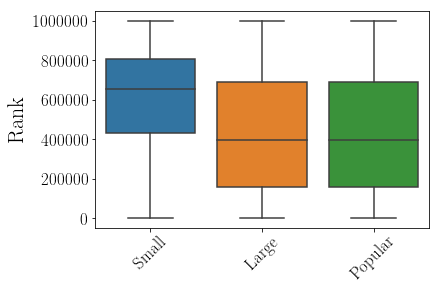


Finding data for Saudi Arabia

In country list, minimum anonymity set size is 1 for a domain length of 26
Removing this length removes 10534 domains in Alexa

In country list, maximum anonymity set size is 39 for a domain length of 13
Removing this length removes 86597 domains in Alexa

In country list, most popular website is youtube.com with length 11
Removing this length removes 78603 domains in Alexa
10534 86597 78603


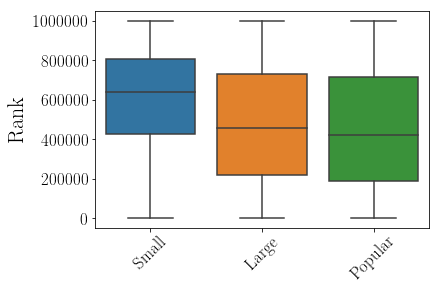


Finding data for Vietnam

In country list, minimum anonymity set size is 1 for a domain length of 30
Removing this length removes 4406 domains in Alexa

In country list, maximum anonymity set size is 31 for a domain length of 12
Removing this length removes 84741 domains in Alexa

In country list, most popular website is facebook.com with length 12
Removing this length removes 84741 domains in Alexa
4406 84741 84741


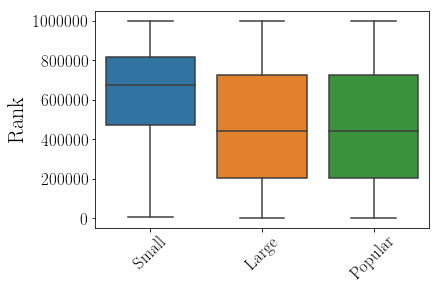


Finding data for China

In country list, minimum anonymity set size is 1 for a domain length of 23
Removing this length removes 19843 domains in Alexa

In country list, maximum anonymity set size is 19 for a domain length of 9
Removing this length removes 47753 domains in Alexa

In country list, most popular website is facebook.com with length 12
Removing this length removes 84741 domains in Alexa
19843 47753 84741


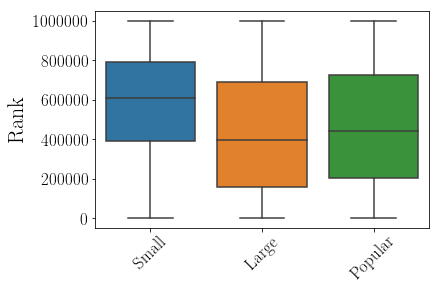

In [114]:
for country in country_files:
    country_fname = join(COUNTRY_DIR, country)
    country_domains, country_domain_lengths = censor_list(country_fname)
    print "\nFinding data for", country_dict[country]
    
    max_anonset_len, min_anonset_len, max_anonset_val, min_anonset_val = find_minmax_anonymous(country_domains, country_domain_lengths)
    min_rankings, min_damage = find_length_rankings_in_alexa(min_anonset_len, alexa_domain_dict, alexa_domains)
    max_rankings, max_damage = find_length_rankings_in_alexa(max_anonset_len, alexa_domain_dict, alexa_domains)
    
    popular_site = find_popular(country_domains)
    popular_rankings, popular_damage = find_length_rankings_in_alexa(len(popular_site), alexa_domain_dict, alexa_domains)
    
    print "\nIn country list, minimum anonymity set size is", min_anonset_val, "for a domain length of", min_anonset_len
    print "Removing this length removes", min_damage, "domains in Alexa"
    print "\nIn country list, maximum anonymity set size is", max_anonset_val, "for a domain length of", max_anonset_len
    print "Removing this length removes", max_damage, "domains in Alexa"
    print "\nIn country list, most popular website is", popular_site, "with length", len(popular_site)
    print "Removing this length removes", popular_damage, "domains in Alexa"
    
    print len(min_rankings), len(max_rankings), len(popular_rankings)
    all_rankings = [min_rankings, max_rankings, popular_rankings]
    df = pd.DataFrame(all_rankings)
    df = df.transpose()
    df.columns = ["Small", "Large", "Popular"]
    sns.boxplot(data=df)
    #sns.swarmplot(data=df, color=".25")
    plt.ylabel("Rank", fontsize=22)
    #plt.xlabel("Length", fontsize=22)
    plt.tick_params(labelsize=17)
    plt.xticks(rotation=45)
    #plt.xticks(range(1, 7), country_list)
    plt.show()
    